# CAR PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
car_sample=pd.read_csv('\\Users\\user\\ipynb file\\datasets\\cars_sampled.csv')
df=car_sample.copy()
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [5]:
d_column=['dateCrawled','name','dateCreated', 'postalCode', 'lastSeen']
for i in d_column:
    del df[i]

In [6]:
df.describe(include='object')

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,50001,50001,50001,44813,47177,47243,45498,50001,40285
unique,2,2,2,8,2,248,7,40,2
top,private,offer,test,limousine,manual,golf,petrol,volkswagen,no
freq,49999,49998,25869,13041,36732,3972,30214,10646,35337


In [7]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000


In [8]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.017604,0.020429,-0.045458,0.000582
yearOfRegistration,0.017604,1.000000,-0.004394,-0.064188,-0.023152
powerPS,0.020429,-0.004394,1.000000,-0.016447,0.034345
kilometer,-0.045458,-0.064188,-0.016447,1.000000,0.001985
monthOfRegistration,0.000582,-0.023152,0.034345,0.001985,1.000000


# DATA CLEANING

In [9]:
###drop duplicate records
df.drop_duplicates(keep='first',inplace=True)
df.shape

(49531, 14)

In [10]:
df.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

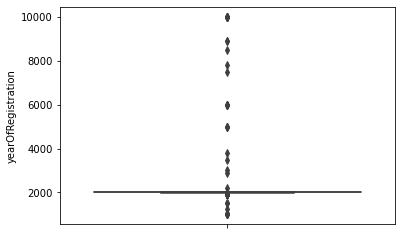

In [11]:
sns.boxplot(y=df['yearOfRegistration'])

In [12]:
yearwise_count = df['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [13]:
#cleaning outliers datas
df['yearOfRegistration'].describe()

count    49531.000000
mean      2005.559710
std        123.571523
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: yearOfRegistration, dtype: float64

In [14]:
#years from 1980 - 2015
df = df[((df['yearOfRegistration']>1980) & (df['yearOfRegistration']<2018))]
df

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


0        1332
500       736
1500      683
1000      630
1200      563
         ... 
21299       1
284         1
9455        1
17699       1
25300       1
Name: price, Length: 2360, dtype: int64


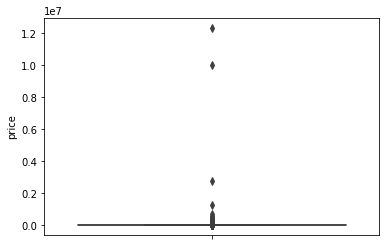

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN


In [15]:
#clean outlier of price
print(df['price'].value_counts())
sns.boxplot(y=df['price'])
plt.show()
df=df[(df['price']<45000)&(df['price']>100)]
df

count    46293.000000
mean       117.334521
std        219.079065
min          0.000000
25%         75.000000
50%        109.000000
75%        150.000000
max      19312.000000
Name: powerPS, dtype: float64


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no
49990,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no


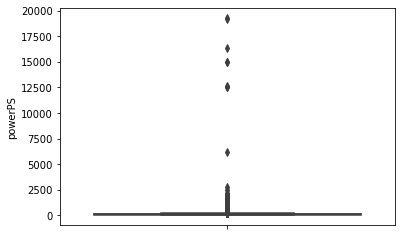

In [16]:
print(df['powerPS'].describe())
sns.boxplot(y=df['powerPS'])
df = df[((df['powerPS']<500) & (df['powerPS']>70))]
df

In [17]:
df['ageOfCar']=abs((df['yearOfRegistration']-1980)+df['monthOfRegistration']/12)
del df['yearOfRegistration']
del df['monthOfRegistration']

<ipython-input-17-aa7954e54210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ageOfCar']=abs((df['yearOfRegistration']-1980)+df['monthOfRegistration']/12)


## VISUALIZATION

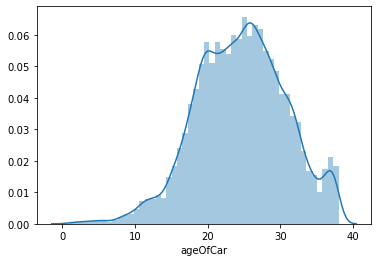

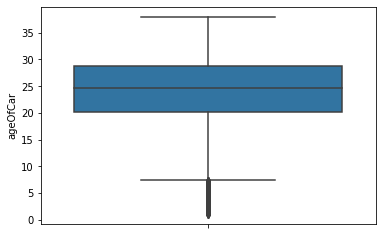

In [18]:
sns.distplot(df['ageOfCar'])
plt.show()
sns.boxplot(y=df['ageOfCar'])

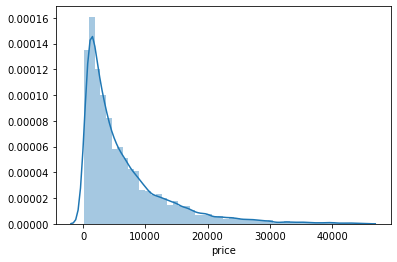

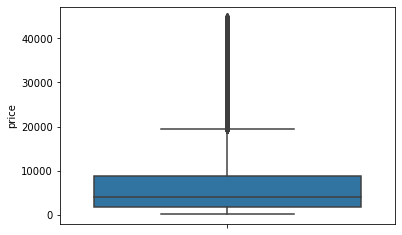

In [19]:
sns.distplot(df['price'])
plt.show()
sns.boxplot(y=df['price'])

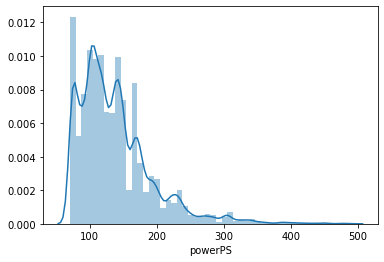

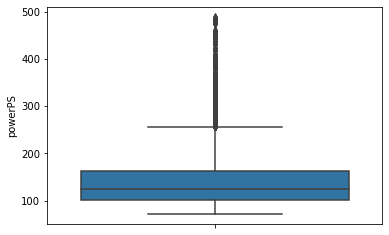

In [20]:
sns.distplot(df['powerPS'])
plt.show()
sns.boxplot(y=df['powerPS'])

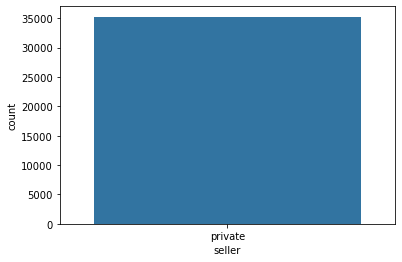

In [21]:
# remove minimum insignificant varible
sns.countplot('seller',data=df)

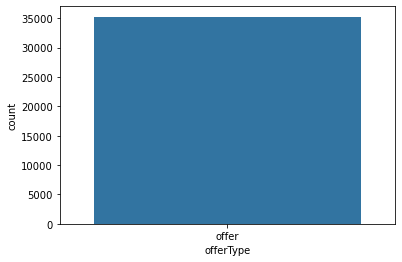

In [22]:
sns.countplot('offerType',data=df)

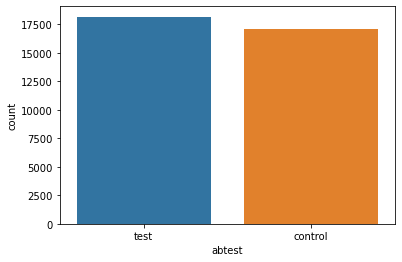

In [23]:
sns.countplot('abtest',data=df)

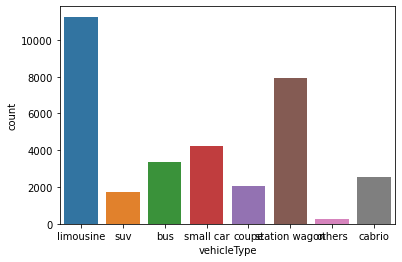

In [24]:
sns.countplot(df['vehicleType'])

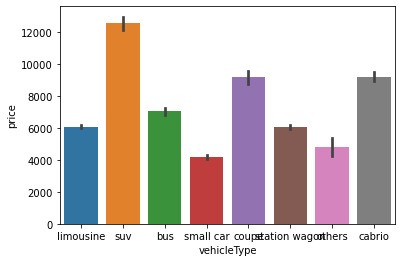

In [25]:
sns.barplot(df['vehicleType'],df['price'])

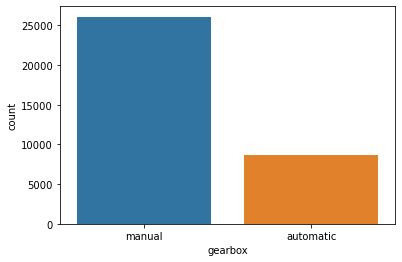

In [26]:
sns.countplot('gearbox',data=df)
plt.show()

In [27]:
pd.crosstab(df['model'],'count')

col_0,count
model,
100,45
145,4
147,58
156,65
159,19
...,...
yaris,72
yeti,27
ypsilon,4


In [28]:
df['brand'].value_counts()

volkswagen        7142
bmw               4795
mercedes_benz     4024
audi              3913
opel              3351
ford              2094
renault           1370
peugeot           1035
mazda              625
seat               592
skoda              570
fiat               468
volvo              425
toyota             425
citroen            413
nissan             413
mini               409
mitsubishi         346
hyundai            337
honda              291
kia                237
alfa_romeo         235
smart              233
suzuki             200
sonstige_autos     187
porsche            159
chevrolet          153
chrysler           148
dacia              117
subaru              98
jeep                83
land_rover          72
jaguar              72
saab                65
rover               47
daewoo              37
lancia              31
daihatsu            27
lada                22
Name: brand, dtype: int64

In [29]:
df['fuelType'].value_counts()

petrol     20490
diesel     12153
lpg          646
cng           60
hybrid        33
other          3
electro        3
Name: fuelType, dtype: int64

In [30]:
df.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:] #age was highest factor

powerPS      0.539577
ageOfCar     0.535271
kilometer    0.502282
Name: price, dtype: float64

In [31]:
#insignificat columns
del df['seller']
del df['offerType']
del df['abtest']

In [32]:
data=df.dropna()
data=pd.get_dummies(data)

## LINEAR REGRESSION

In [33]:
x=data.iloc[:,1:]
y=data['price']

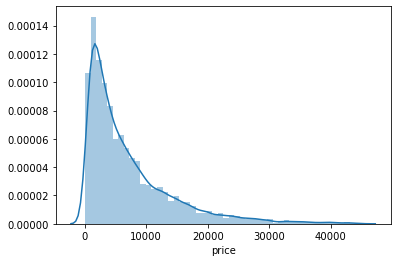

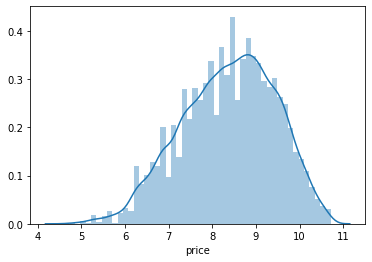

In [34]:
sns.distplot(y)
plt.show()
y=np.log(y)
sns.distplot(y)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 3)

In [37]:
reg=LinearRegression(fit_intercept=True)
model=reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("accuracy = ",model.score(x_test,y_test))

accuracy =  0.8067958907087334


In [38]:
mse=np.square(mean_squared_error(y_test,y_pred))

In [39]:
r = abs(y_test - y_pred)
r.describe()

count    8367.000000
mean        0.323160
std         0.342565
min         0.000021
25%         0.107574
50%         0.231497
75%         0.418902
max         5.680782
Name: price, dtype: float64